In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# import danych
df = pd.read_csv("steam_games.csv",
                delimiter = ",")

In [15]:
df

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2719590,Light No Fire,['Hello Games'],['Hello Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure']",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",True,...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],True,...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71424,2294300,Touchdown Pinball,['Super PowerUp Games'],['Super PowerUp Games'],"['Single-player', 'Steam Achievements', 'Full ...",['Simulation'],0,15,['windows'],True,...,[],2,2,0,0.0,2 user reviews,100.0,0,False,2.99
71425,2294250,Speed Golf Royale,['Mainframe Games'],['Mainframe Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Casual', 'Indie', 'Massively Multi...",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
71426,2294160,Isle of Swaps,['Fuzz Force'],['Fuzz Force'],"['Single-player', 'Steam Achievements', 'Steam...","['Indie', 'RPG', 'Strategy']",0,29,['windows'],True,...,[],72,66,6,8.0,Very Positive,91.7,0,False,14.99
71427,2294130,Goobies,['Knifes'],['Knifes'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Casual', 'Indie', 'RPG', 'Strategy']",0,43,['windows'],True,...,[],1442,1312,130,8.0,Very Positive,91.0,0,False,5.99


Stąd widzimy jakie kolumny są wnaszej ramce - niektóre z nich to:
nazwa gry, 
nazwa dewelepera, 
wiek minimalny do grania, 
kategoria - czy gra jest single/multi player

## Zadanie 1
Ogólne informacje o zbiorze danych


In [22]:
n_row, n_col = df.shape
print(f"Liczba wierszy to: {n_row}, a liczba kolumn to {n_col}")

# Dane bez braków
df_new = df.dropna().reset_index(drop = True)

n_row_new, n_col_new = df_new.shape
print(f"Liczba wierszy bez braków to: {n_row_new}, a liczba kolumn bez braków to {n_col_new}")

Liczba wierszy to: 71429, a liczba kolumn to 21
Liczba wierszy bez braków to: 71429, a liczba kolumn bez braków to 21


Widzimy że nie ma żadnych braków danych


In [23]:
print(df.dtypes)

steam_appid              int64
name                    object
developers              object
publishers              object
categories              object
genres                  object
required_age             int64
n_achievements           int64
platforms               object
is_released               bool
release_date            object
additional_content      object
total_reviews            int64
total_positive           int64
total_negative           int64
review_score           float64
review_score_desc       object
positive_percentual    float64
metacritic               int64
is_free                   bool
price_initial (USD)    float64
dtype: object


In [26]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"\nLiczba kolumn z danymi ilościowymi: {len(num_cols)} - {num_cols}")
print(f"Liczba kolumn z danymi jakoścoiwymi : {len(cat_cols)} - {cat_cols}")


Liczba kolumn z danymi ilościowymi: 10 - ['steam_appid', 'required_age', 'n_achievements', 'total_reviews', 'total_positive', 'total_negative', 'review_score', 'positive_percentual', 'metacritic', 'price_initial (USD)']
Liczba kolumn z danymi jakoścoiwymi : 11 - ['name', 'developers', 'publishers', 'categories', 'genres', 'platforms', 'is_released', 'release_date', 'additional_content', 'review_score_desc', 'is_free']


## Zadanie 2

Dla zmiennych ilościowych - podstawowe statystyki

In [32]:
stat_num = df[num_cols].describe().T
stat_num["median"] = df[num_cols].apply(lambda x: np.nanmedian(x))
stat_num = stat_num[["mean","median","std","min","25%","50%","75%","max"]]
stat_num

,mean,median,std,min,25%,50%,75%,max
steam_appid,1.613700e+06,1533470.00,862555.941913,730.0,929640.0,1533470.00,2383530.00,3430140.00
required_age,2.573227e+00,0.00,13.591997,0.0,0.0,0.00,0.00,97.00
n_achievements,1.607948e+01,0.00,138.084319,0.0,0.0,0.00,16.00,9821.00
total_reviews,4.102497e+02,2.00,8389.933637,0.0,0.0,2.00,19.00,1279700.00
total_positive,3.602238e+02,2.00,7409.672044,0.0,0.0,2.00,14.00,1107275.00
total_negative,5.002589e+01,0.00,1171.055349,0.0,0.0,0.00,4.00,172425.00
review_score,2.192849e+00,0.00,3.175885,0.0,0.0,0.00,5.00,9.00
positive_percentual,4.611329e+01,50.00,41.961702,0.0,0.0,50.00,88.00,100.00
metacritic,2.573227e+00,0.00,13.591997,0.0,0.0,0.00,0.00,97.00
price_initial (USD),6.528184e+00,2.99,13.186426,0.0,0.0,2.99,9.99,999.98


### Przykładowe Wnioski

Patrząc na średnie można odczytać najbardziej ogólnie wnioski jak np. średnia cena gry to 6.5 dolarów, czy najczęściej gry nie maja narzuconego ogrzaniczenia wiekowego - mediana wymaganego wikeu to 0

## Zadanie 3

In [42]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# wybieramy kilka numerycznych kolumn, które porównamy między tym czy gra jest darmowa
wybrane_num = ['price_initial (USD)', 'total_positive', 'total_negative']

# grupujemy po tym czy gra jest darmowa i obliczamy: mean, median, std dla każdej z wybranych kolumn
grupa_rocznik = df.groupby('is_free')[wybrane_num].agg(['mean','median','std']).sort_index()
grupa_rocznik


price_initial (USD)                   total_positive         \
                       mean median        std           mean median   
is_free                                                               
False              7.534713   4.99  13.896555     391.722097    3.0   
True               0.001673   0.00   0.114748     155.983550    0.0   

                      total_negative                      
                  std           mean median          std  
is_free                                                   
False     6559.316339      52.084318    1.0   963.049949  
True     11484.367131      36.678646    0.0  2061.534825

Widzimy że dla darmowych gier występuje coś ciekawgo, bo średnia cena różni się od 0 jak powinno być i liczba opni zarówno negatywnych jak i pozytywnych jest mniejsza niż w przypadku gier płatnych

## Zadanie 4

In [ ]:
gatunki_dummies = df['genres'].str.get_dummies(sep='|')

# Sumujemy wystąpienia
czestosci_gatunkow = gatunki_dummies.sum().sort_values(ascending=False)

# Bierzemy top10 najczęstszych gatunków
top10_gatunkow = czestosci_gatunkow.head(10)
print(top10_gatunkow)


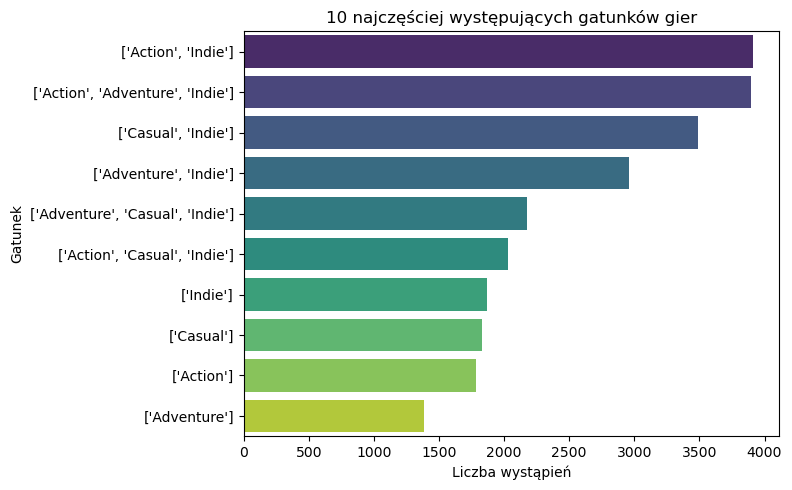

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x=top10_gatunkow.values, y=top10_gatunkow.index, palette="viridis")
plt.title("10 najczęściej występujących gatunków gier")
plt.xlabel("Liczba wystąpień")
plt.ylabel("Gatunek")
plt.tight_layout()
plt.show()


Widzimy, że najwięcej jest gier typu indi i action, i ogólnie typ indie dominuje

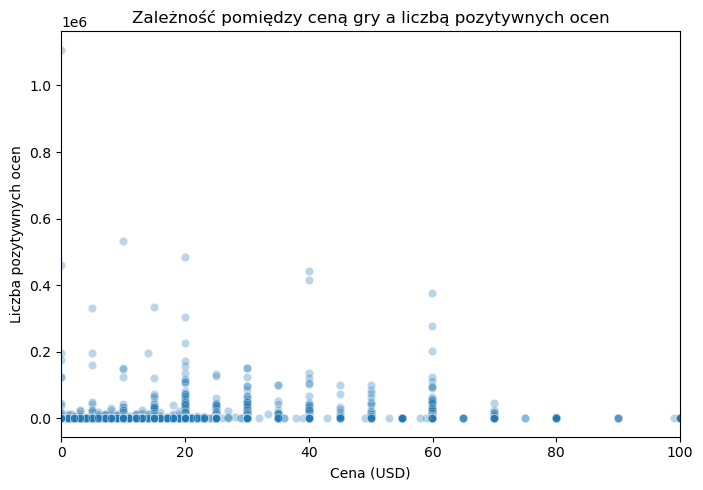

In [57]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df.dropna(subset=['price_initial (USD)','total_positive']), 
                x='price_initial (USD)', 
                y='total_positive', 
                alpha=0.3)
plt.title("Zależność pomiędzy ceną gry a liczbą pozytywnych ocen")
plt.xlabel("Cena (USD)")
plt.ylabel("Liczba pozytywnych ocen")
plt.tight_layout()
plt.xlim(0, 100)
plt.show()


Widzimy, że najwięcej pozytywch opini jest dla gier o cencach 10 USD, 20 USD i 40 USD, co może oznaczać że jednak trzeba troche wydać pieniędzy aby zagrać w "dobra" gre

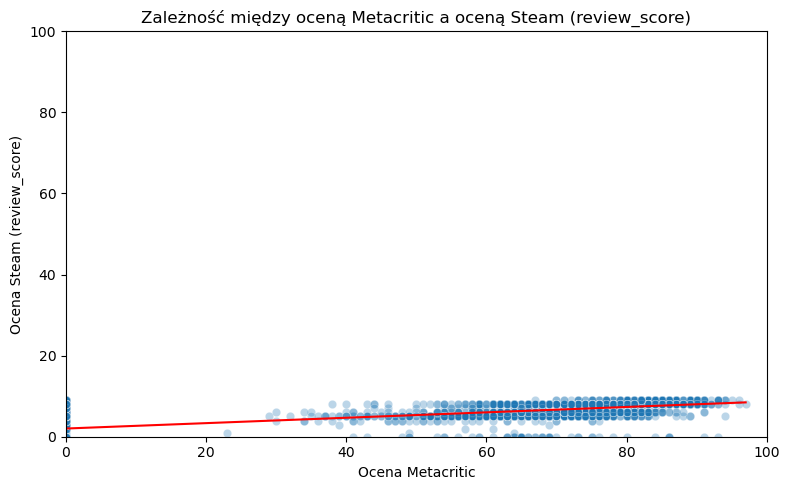

In [58]:
df_plot = df.copy()

df_plot['review_score'] = df_plot['review_score'].astype(float)
df_plot['metacritic']    = df_plot['metacritic'].astype(float)

df_plot = df_plot[(df_plot['review_score'] >= 0) & (df_plot['review_score'] <= 100)]
df_plot = df_plot[(df_plot['metacritic'] >= 0)    & (df_plot['metacritic'] <= 100)]

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_plot,
    x='metacritic',
    y='review_score',
    alpha=0.3
)
sns.regplot(
    data=df_plot,
    x='metacritic',
    y='review_score',
    scatter=False,
    line_kws={'color': 'red', 'lw': 1.5}
)

plt.title("Zależność między oceną Metacritic a oceną Steam (review_score)")
plt.xlabel("Ocena Metacritic")
plt.ylabel("Ocena Steam (review_score)")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Na wykresie widać lekko dodatnią zależność między oceną Metacritic a oceną Steam – czerwona linia regresji ma niewielkie, ale dodatnie nachylenie. Oznacza to, że gry wysoko oceniane przez krytyków (Metacritic) zazwyczaj również zbierają nieco wyższe oceny od użytkowników na Steami